In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (12,8)
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay


In [6]:
initial_dataset = pd.read_csv('/content/drive/MyDrive/Salary_prediction/Salary_Data.csv')
initial_dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
initial_dataset.info()
print("---------------------")
"Dataset Shape:" ,initial_dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
---------------------


('Dataset Shape:', (375, 6))

In [8]:
initial_dataset.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

<Axes: >

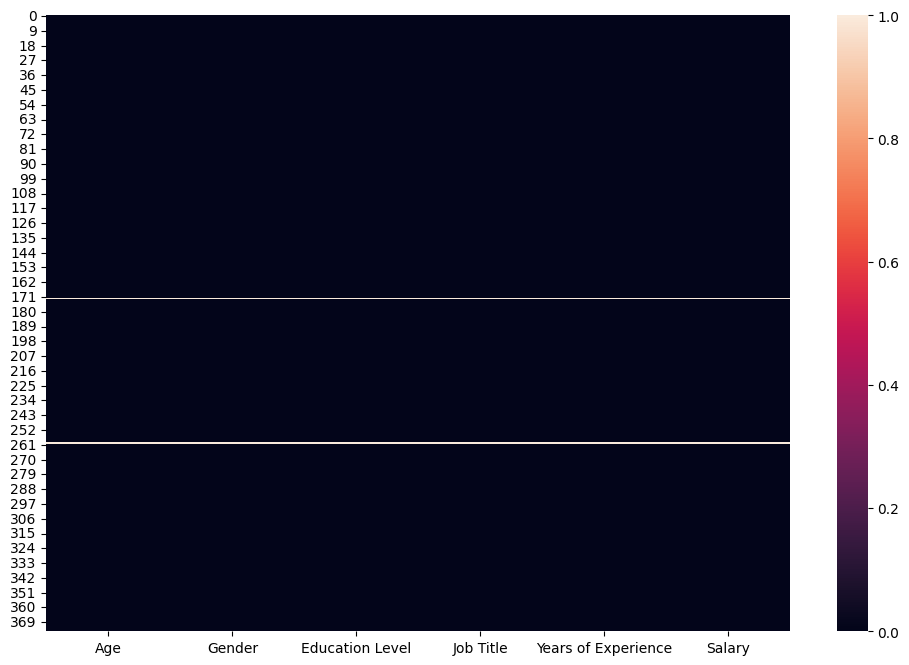

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(initial_dataset.isnull()) #white lines are null values

In [10]:
initial_dataset.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


Gender
Male      194
Female    179
Name: count, dtype: int64


<Axes: xlabel='Gender'>

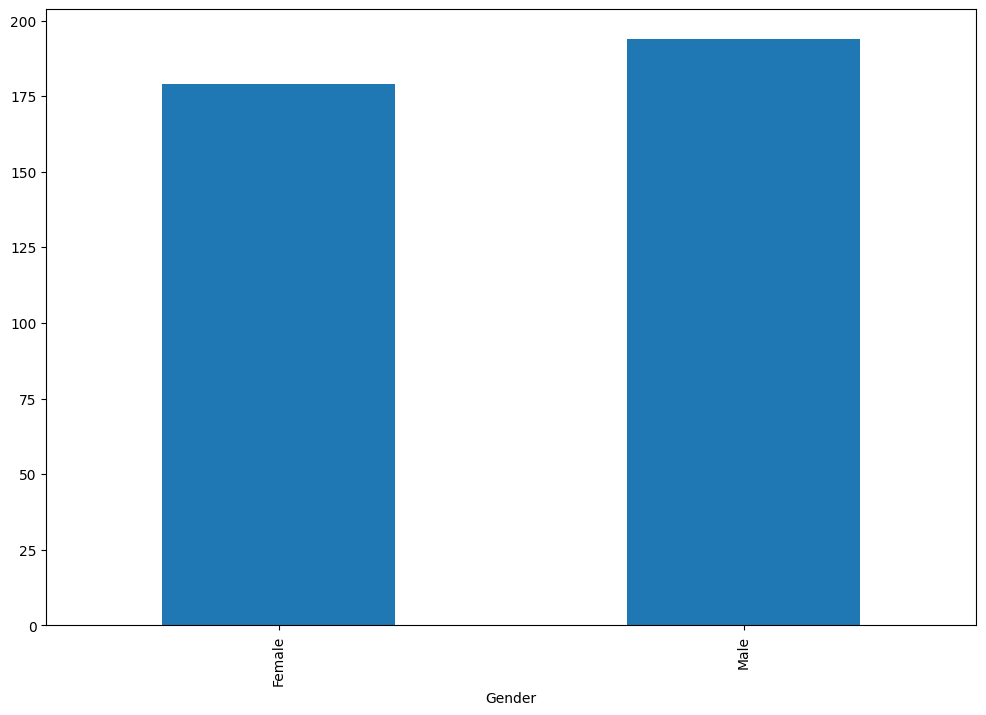

In [11]:
print(initial_dataset["Gender"].value_counts())
initial_dataset.groupby('Gender').size().plot(kind='bar', label="Type")

In [20]:

Eduhist= px.histogram(initial_dataset, x='Education Level', color="Salary", title="Distribution of Salary cases with Education Level")
Eduhist.show()

In [21]:

Genderhist= px.histogram(initial_dataset, x='Gender', color="Salary", title="Distribution of Salary cases with Gender")
Genderhist.show()

In [22]:
Agehist= px.histogram(initial_dataset, x='Age', color="Salary", title="Distribution of Salary cases with Age")
Agehist.show()

In [25]:
Jobhist= px.histogram(initial_dataset, x='Job Title', color="Salary", title="Distribution of Salary cases with JOb")
Jobhist.show()

In [26]:
Exphist= px.histogram(initial_dataset, x='Years of Experience', color="Salary", title="Distribution of Salary cases with Experience")
Exphist.show()

In [27]:
ExpJobhist= px.histogram(initial_dataset, x='Years of Experience', color="Job Title", title="Distribution of experience cases with Job")
ExpJobhist.show()

In [28]:
clspi = px.pie(initial_dataset, values='Age', names='Salary', title= "Ratio of Salary and Age")
clspi.show()

In [31]:
clspia = px.pie(initial_dataset, values='Years of Experience', names='Salary', title= "Ratio of Salary and Years of Experience")
clspia.show()

In [33]:

pltbl = ['Gender', 'Salary']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

Salary,350.000000,30000.000000,35000.000000,40000.000000,45000.000000,50000.000000,55000.000000,60000.000000,65000.000000,70000.000000,75000.000000,80000.000000,85000.000000,90000.000000,95000.000000,100000.000000,105000.000000,110000.000000,115000.000000,120000.000000,125000.000000,130000.000000,135000.000000,140000.000000,145000.000000,150000.000000,155000.000000,160000.000000,170000.000000,175000.000000,180000.000000,185000.000000,190000.000000,200000.000000,220000.000000,250000.000000
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,0.000000,0.000000,38.460000,51.610000,66.670000,59.090000,60.000000,29.410000,55.560000,66.670000,0.000000,75.000000,70.000000,38.890000,40.910000,50.000000,16.670000,47.060000,0.000000,55.000000,0.000000,35.710000,0.000000,64.290000,100.000000,61.110000,0.000000,58.820000,12.500000,0.000000,60.000000,100.000000,25.000000,0.000000,0.000000,0.000000
Male,100.000000,100.000000,61.540000,48.390000,33.330000,40.910000,40.000000,70.590000,44.440000,33.330000,100.000000,25.000000,30.000000,61.110000,59.090000,50.000000,83.330000,52.940000,100.000000,45.000000,100.000000,64.290000,100.000000,35.710000,0.000000,38.890000,100.000000,41.180000,87.500000,100.000000,40.000000,0.000000,75.000000,100.000000,100.000000,100.000000


In [34]:
pltbl = ['Age', 'Salary']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

Salary,350.000000,30000.000000,35000.000000,40000.000000,45000.000000,50000.000000,55000.000000,60000.000000,65000.000000,70000.000000,75000.000000,80000.000000,85000.000000,90000.000000,95000.000000,100000.000000,105000.000000,110000.000000,115000.000000,120000.000000,125000.000000,130000.000000,135000.000000,140000.000000,145000.000000,150000.000000,155000.000000,160000.000000,170000.000000,175000.000000,180000.000000,185000.000000,190000.000000,200000.000000,220000.000000,250000.000000
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23.000000,0.000000,0.000000,7.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24.000000,0.000000,0.000000,0.000000,3.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25.000000,0.000000,100.000000,15.380000,3.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26.000000,0.000000,0.000000,23.080000,6.450000,11.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27.000000,0.000000,0.000000,15.380000,6.450000,16.670000,4.550000,0.000000,0.000000,11.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
28.000000,0.000000,0.000000,15.380000,29.030000,5.560000,0.000000,0.000000,0.000000,11.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29.000000,100.000000,0.000000,23.080000,35.480000,16.670000,9.090000,10.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30.000000,0.000000,0.000000,0.000000,16.130000,22.220000,13.640000,20.000000,5.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
31.000000,0.000000,0.000000,0.000000,0.000000,16.670000,50.000000,40.000000,5.880000,0.000000,0.000000,0.000000,8.330000,0.000000,0.000000,4.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
pltbl = ['Years of Experience', 'Salary']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

Salary,350.000000,30000.000000,35000.000000,40000.000000,45000.000000,50000.000000,55000.000000,60000.000000,65000.000000,70000.000000,75000.000000,80000.000000,85000.000000,90000.000000,95000.000000,100000.000000,105000.000000,110000.000000,115000.000000,120000.000000,125000.000000,130000.000000,135000.000000,140000.000000,145000.000000,150000.000000,155000.000000,160000.000000,170000.000000,175000.000000,180000.000000,185000.000000,190000.000000,200000.000000,220000.000000,250000.000000
Years of Experience,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,100.000000,15.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.500000,0.000000,0.000000,7.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.000000,0.000000,0.000000,30.770000,6.450000,5.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.500000,100.000000,0.000000,38.460000,9.680000,11.110000,4.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.000000,0.000000,0.000000,7.690000,80.650000,11.110000,4.550000,10.000000,0.000000,11.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.000000,0.000000,0.000000,0.000000,3.230000,55.560000,50.000000,40.000000,5.880000,11.110000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.730000,20.000000,58.820000,22.220000,0.000000,0.000000,8.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5.000000,0.000000,0.000000,0.000000,0.000000,11.110000,18.180000,10.000000,0.000000,0.000000,66.670000,25.000000,16.670000,0.000000,5.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,22.220000,11.110000,0.000000,8.330000,0.000000,11.110000,9.090000,21.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
pltbl = ['Job Title', 'Salary']
cm = plt.cm.get_cmap('Reds')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

Salary,350.000000,30000.000000,35000.000000,40000.000000,45000.000000,50000.000000,55000.000000,60000.000000,65000.000000,70000.000000,75000.000000,80000.000000,85000.000000,90000.000000,95000.000000,100000.000000,105000.000000,110000.000000,115000.000000,120000.000000,125000.000000,130000.000000,135000.000000,140000.000000,145000.000000,150000.000000,155000.000000,160000.000000,170000.000000,175000.000000,180000.000000,185000.000000,190000.000000,200000.000000,220000.000000,250000.000000
Job Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Account Manager,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Accountant,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Administrative Assistant,0.000000,0.000000,0.000000,0.000000,5.560000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Business Analyst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,8.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Business Development Manager,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Business Intelligence Analyst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CEO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
Chief Data Officer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
Chief Technology Officer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000


In [38]:
pltbl = ['Education Level', 'Salary']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

Salary,350.000000,30000.000000,35000.000000,40000.000000,45000.000000,50000.000000,55000.000000,60000.000000,65000.000000,70000.000000,75000.000000,80000.000000,85000.000000,90000.000000,95000.000000,100000.000000,105000.000000,110000.000000,115000.000000,120000.000000,125000.000000,130000.000000,135000.000000,140000.000000,145000.000000,150000.000000,155000.000000,160000.000000,170000.000000,175000.000000,180000.000000,185000.000000,190000.000000,200000.000000,220000.000000,250000.000000
Education Level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bachelor's,100.000000,100.000000,100.000000,96.770000,88.890000,95.450000,100.000000,100.000000,77.780000,100.000000,50.000000,58.330000,90.000000,66.670000,72.730000,64.290000,33.330000,58.820000,0.000000,50.000000,100.000000,85.710000,50.000000,14.290000,0.000000,11.110000,0.000000,11.760000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,50.000000
Master's,0.000000,0.000000,0.000000,3.230000,11.110000,4.550000,0.000000,0.000000,22.220000,0.000000,50.000000,41.670000,10.000000,33.330000,27.270000,35.710000,66.670000,35.290000,66.670000,40.000000,0.000000,14.290000,50.000000,42.860000,0.000000,11.110000,0.000000,11.760000,87.500000,100.000000,65.000000,0.000000,75.000000,100.000000,0.000000,0.000000
PhD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.880000,33.330000,10.000000,0.000000,0.000000,0.000000,42.860000,100.000000,77.780000,100.000000,76.470000,12.500000,0.000000,30.000000,100.000000,25.000000,0.000000,100.000000,50.000000


In [39]:
from sklearn import preprocessing
doing_preprocessing = preprocessing.LabelEncoder()

In [40]:
dataset =initial_dataset.copy()   # Duplicating the Dataset because i need to convert catagorical values to numeric values
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [135]:
cat_list=[i for i in dataset.select_dtypes("object")]

In [137]:
for i in cat_list:
    dataset[i] = dataset[i].factorize()[0]
dataset.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,9,1,0,159,7,13
1,5,0,1,17,5,8
2,22,1,2,130,17,25
3,13,0,0,101,9,7
4,29,1,1,22,22,33
5,6,1,0,81,4,6
6,19,0,1,93,14,19
7,8,1,0,104,6,11
8,3,0,0,82,2,4
9,15,1,2,150,12,17


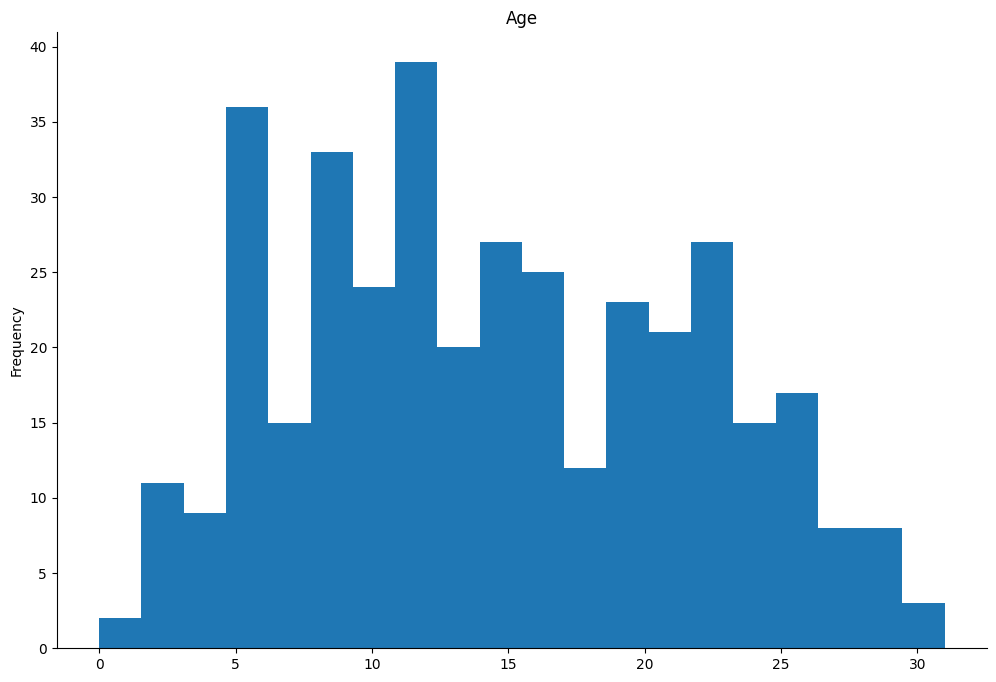

In [139]:
from matplotlib import pyplot as plt
dataset['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

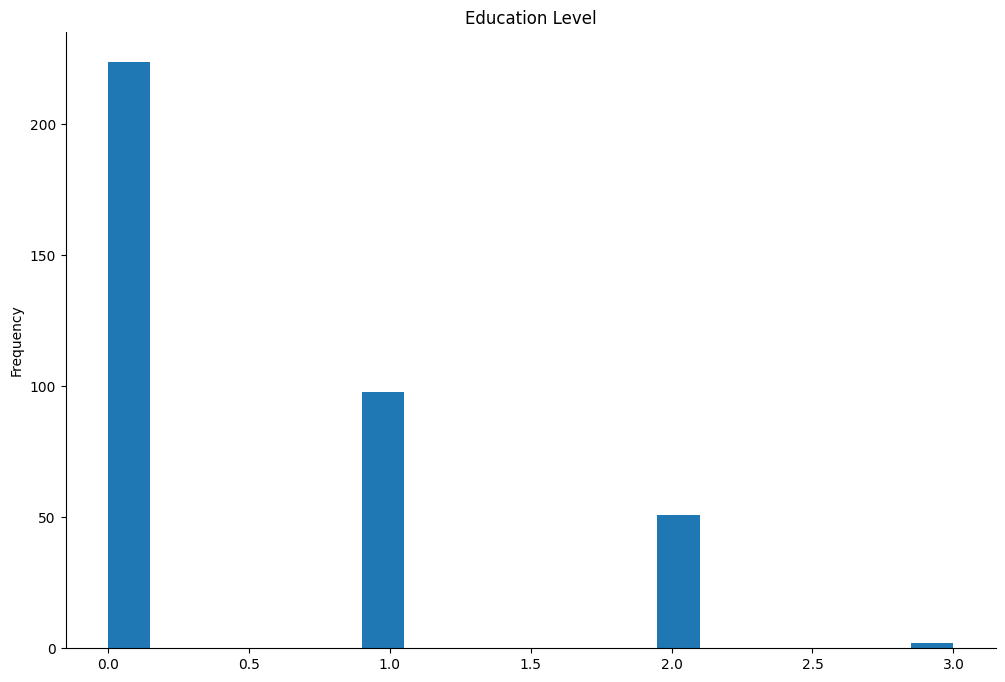

In [140]:
from matplotlib import pyplot as plt
dataset['Education Level'].plot(kind='hist', bins=20, title='Education Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

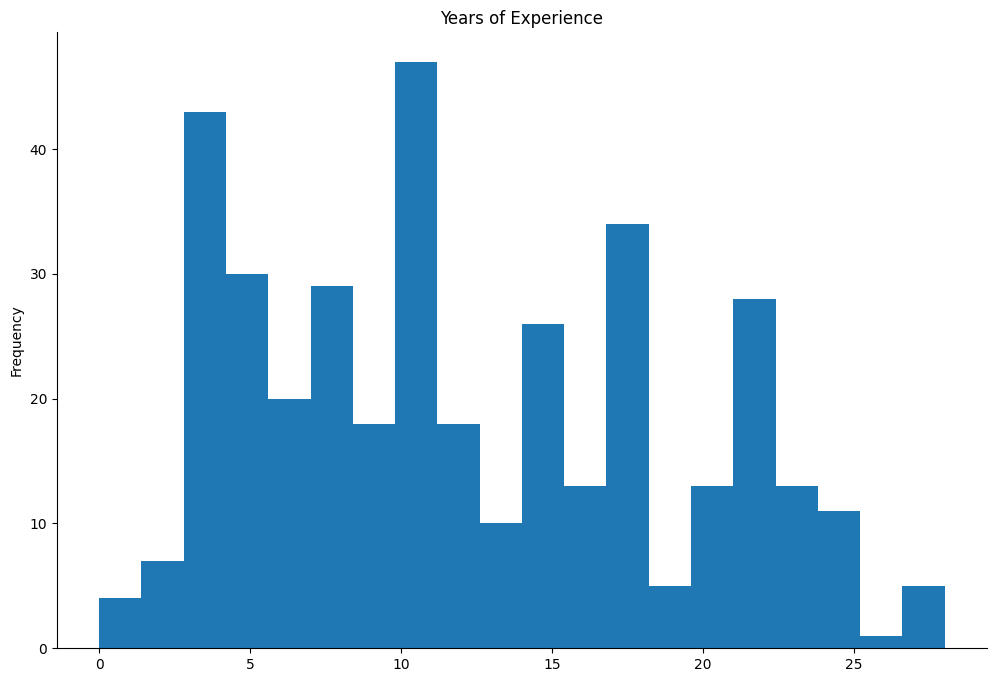

In [141]:
from matplotlib import pyplot as plt
dataset['Years of Experience'].plot(kind='hist', bins=20, title='Years of Experience')
plt.gca().spines[['top', 'right',]].set_visible(False)

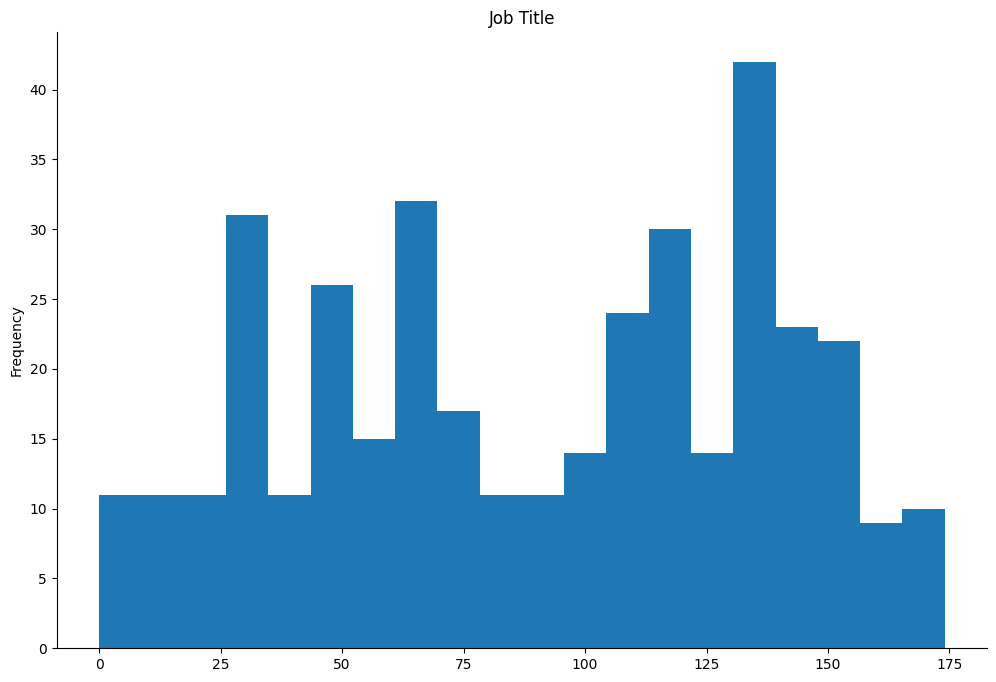

In [142]:
from matplotlib import pyplot as plt
dataset['Job Title'].plot(kind='hist', bins=20, title='Job Title')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [143]:
corr=dataset.corr()
corr

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
Age,1.000000,0.016139,0.578991,0.137070,0.980984,0.929766
Gender,0.016139,1.000000,0.008677,0.041562,0.039621,0.097201
Education Level,0.578991,0.008677,1.000000,0.127791,0.604490,0.689954
Job Title,0.137070,0.041562,0.127791,1.000000,0.124856,0.183590
Years of Experience,0.980984,0.039621,0.604490,0.124856,1.000000,0.935263
Salary,0.929766,0.097201,0.689954,0.183590,0.935263,1.000000


In [91]:

dataset.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

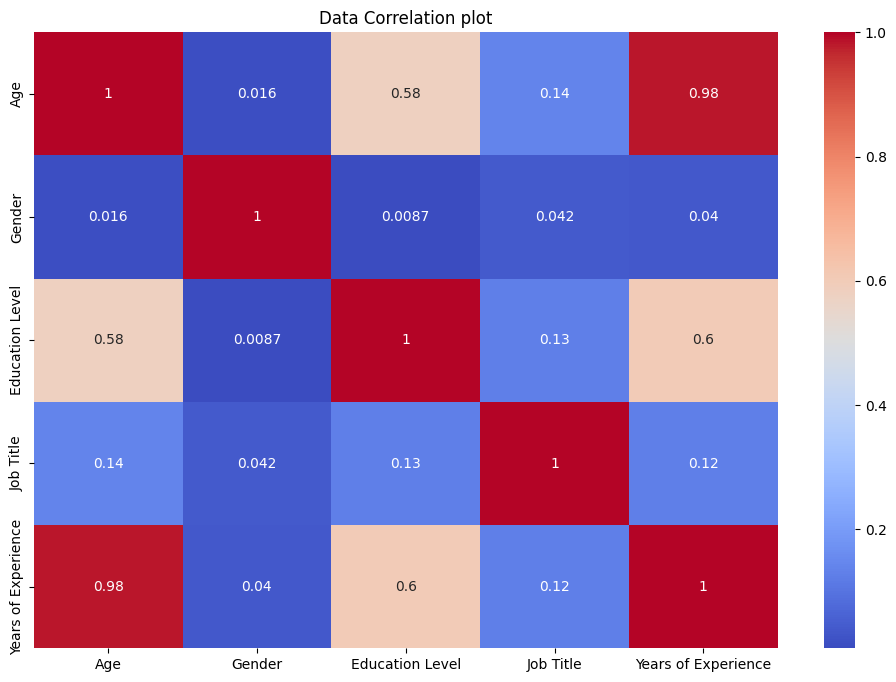

In [49]:
keep_features =dataset.drop(initial_dataset.columns[-1],axis=1)
fig = plt.figure(figsize=(12, 8))
corr_plot = sns.heatmap(keep_features.corr(),annot = True, cmap = 'coolwarm' )
plt.title("Data Correlation plot")
plt.show()

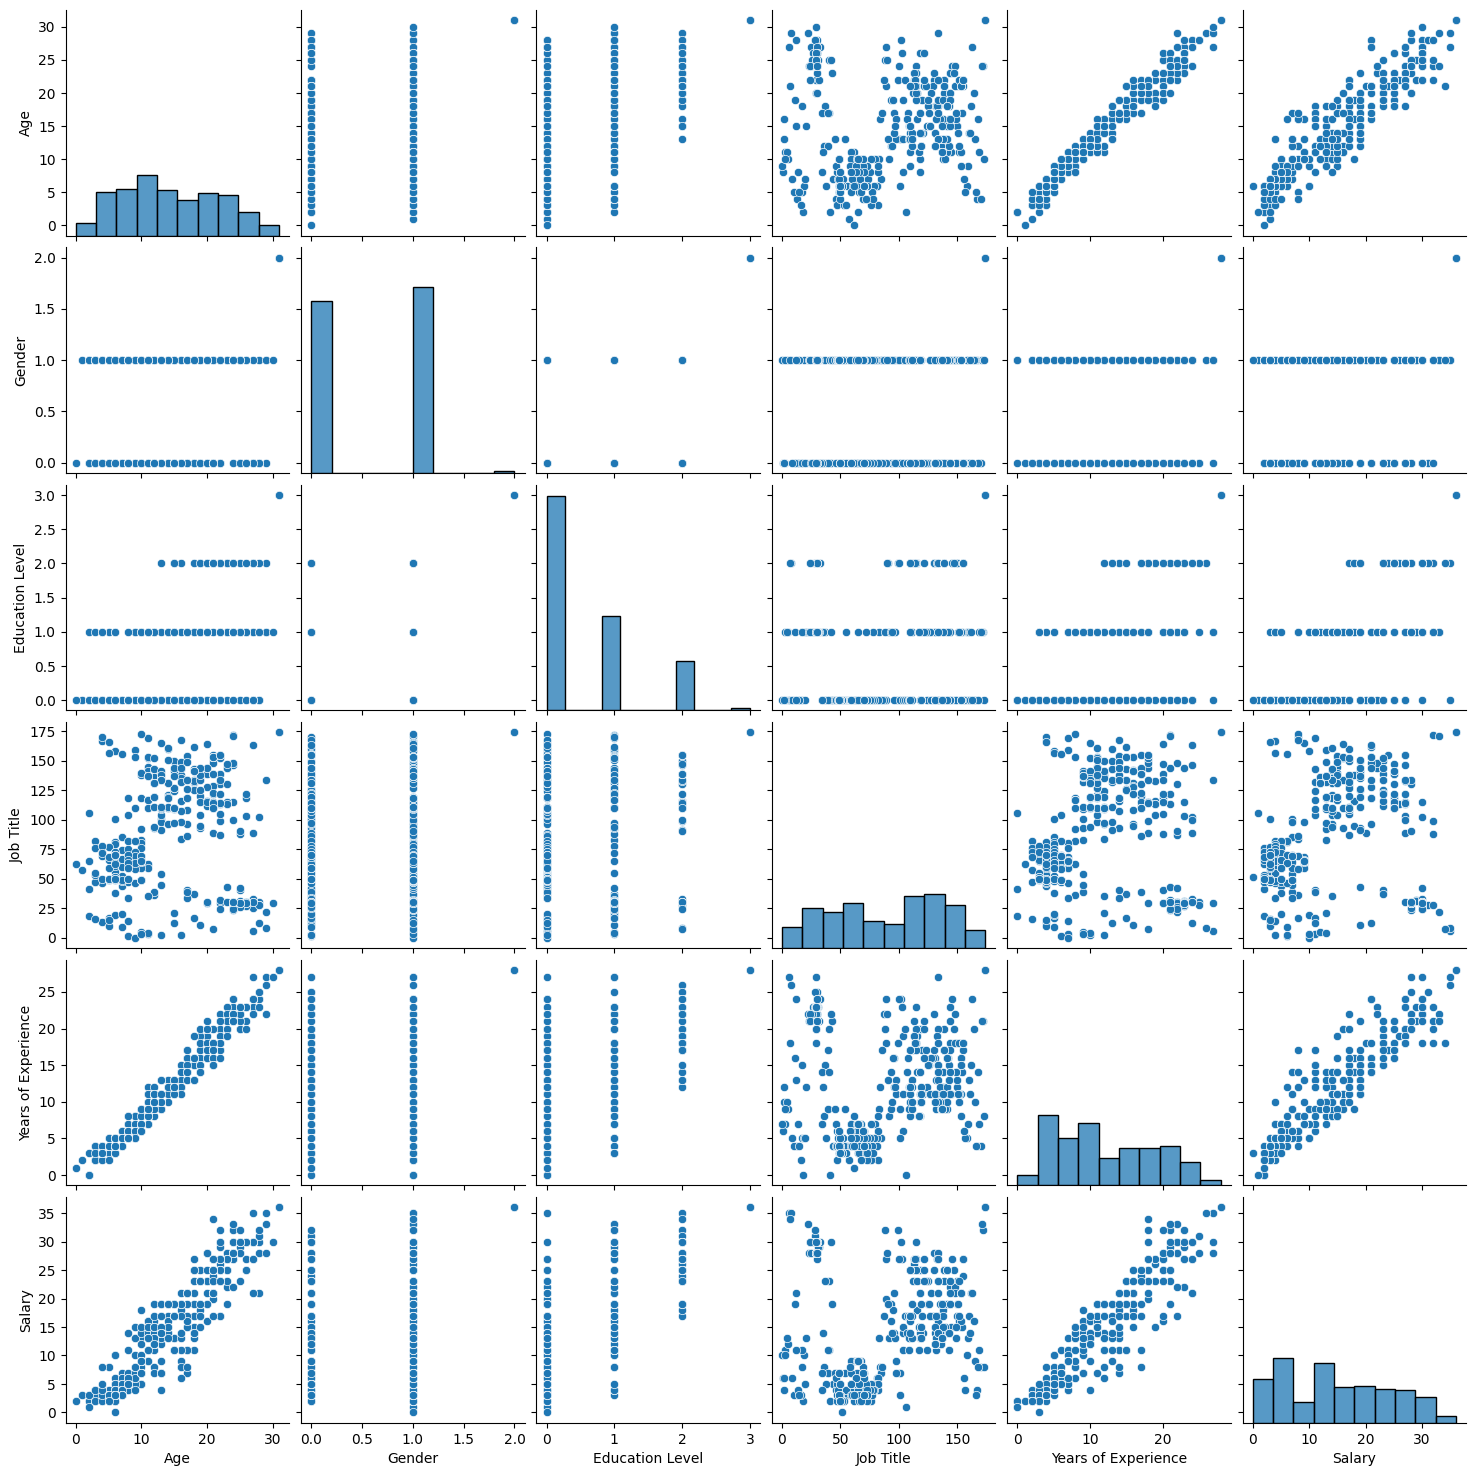

In [50]:
sns.pairplot(dataset)

In [51]:
from sklearn.model_selection import train_test_split
x = dataset.drop(['Salary'], axis = 1)
y = dataset[['Salary']]
x.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,9,1,0,159,7
1,5,0,1,17,5
2,22,1,2,130,17
3,13,0,0,101,9
4,29,1,1,22,22


In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x)
# transform data
x = scaler.transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(375, 5) (300, 5) (75, 5)


In [165]:
print("per-feature minimum after scaling:\n {}".format(
    x_train.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    x_train.max(axis=0)))


per-feature minimum after scaling:
 Age                    1
Gender                 0
Education Level        0
Job Title              1
Years of Experience    0
dtype: int64
per-feature maximum after scaling:
 Age                     31
Gender                   2
Education Level          3
Job Title              174
Years of Experience     28
dtype: int64


In [166]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [167]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(262, 5)
(113, 5)
(262,)
(113,)


In [168]:
dt=DecisionTreeRegressor()

In [169]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [170]:
y_predict = dt.predict(x_test)

In [171]:
dt.score(x_train,y_train)

1.0

In [181]:
k=dt.score(x_test,y_test)
print(k)

0.901764398830131


Accuracy: 92.24194315120019
mean_squared_error: 6.331896460176992
mean_absolute_error: 1.7788495575221237


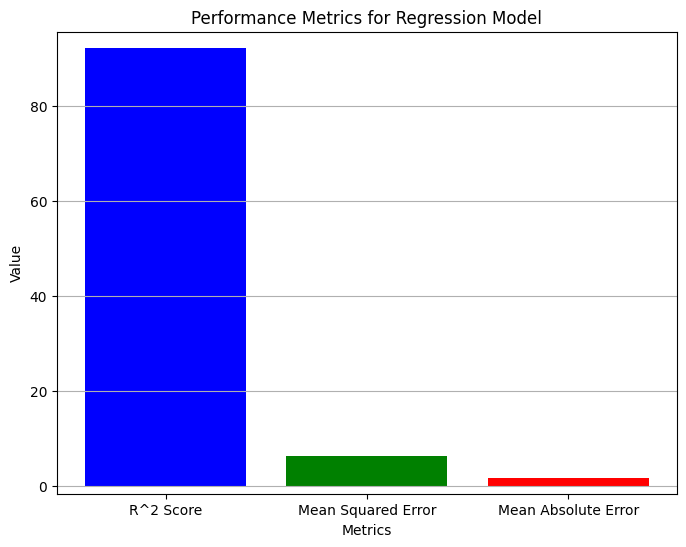

In [209]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
accuracyDT=(r2_score(y_test, y_predict)*100)
print("Accuracy:",accuracyDT)
mse=(mean_squared_error(y_test, y_predict))
print("mean_squared_error:",mse)
mae=(mean_absolute_error(y_test, y_predict))
print("mean_absolute_error:",mae)

metrics_names = ['R^2 Score', 'Mean Squared Error', 'Mean Absolute Error']
metrics_values = [accuracyDT, mse, mae]

# Plotting the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics for Regression Model')
plt.ylim([min(metrics_values) - 0.1 * np.mean(metrics_values), max(metrics_values) + 0.1 * np.mean(metrics_values)])
plt.grid(axis='y')
plt.show()



0.8541775990051508
Accuracy: 85.41775990051508
mean_squared_error: 11.901592920353984
mean_absolute_error: 2.307964601769911


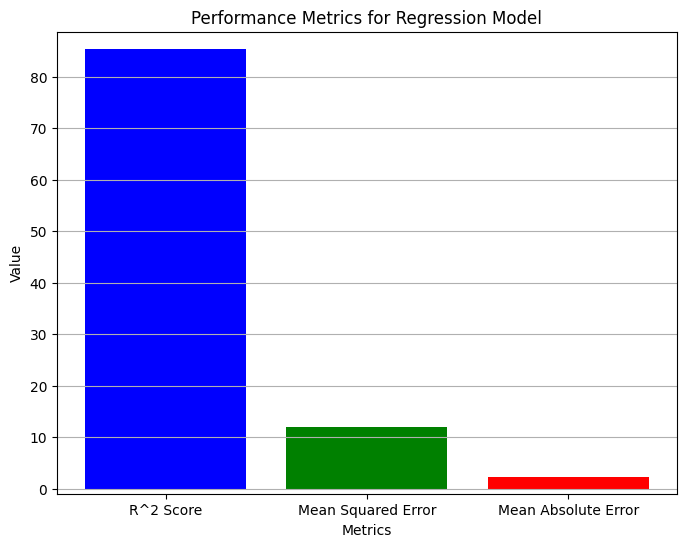

In [210]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
knn.score(x_train,y_train)
m=knn.score(x_test,y_test)
print(m)
accuracyKNN=(r2_score(y_test, y_predict)*100)
print("Accuracy:",accuracyKNN)
mse=(mean_squared_error(y_test, y_predict))
print("mean_squared_error:",mse)
mae=(mean_absolute_error(y_test, y_predict))
print("mean_absolute_error:",mae)

metrics_names = ['R^2 Score', 'Mean Squared Error', 'Mean Absolute Error']
metrics_values = [accuracyKNN, mse, mae]

# Plotting the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics for Regression Model')
plt.ylim([min(metrics_values) - 0.1 * np.mean(metrics_values), max(metrics_values) + 0.1 * np.mean(metrics_values)])
plt.grid(axis='y')
plt.show()


0.4823185234949313
Accuracy: 48.23185234949313
mean_squared_error: 42.2516304335762
mean_absolute_error: 4.60971178884617


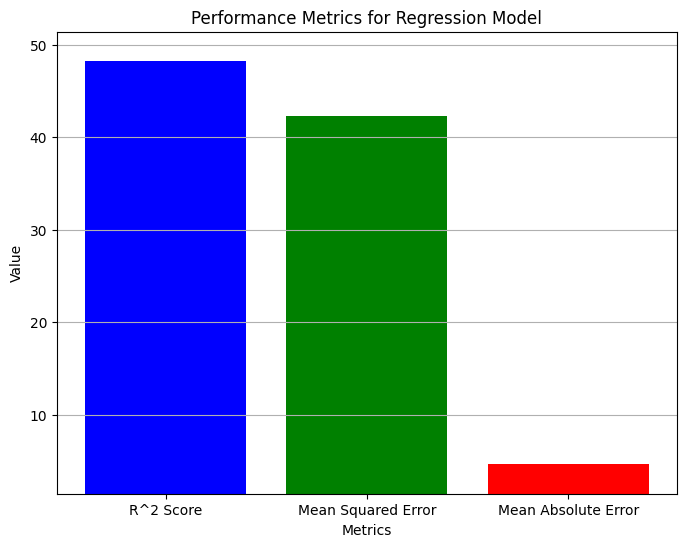

In [212]:
svm=SVR()
svm.fit(x_train,y_train)
y_predict = svm.predict(x_test)
svm.score(x_train,y_train)
m=svm.score(x_test,y_test)
print(m)
accuracySVM=(r2_score(y_test, y_predict)*100)
print("Accuracy:",accuracySVM)
mse=(mean_squared_error(y_test, y_predict))
print("mean_squared_error:",mse)
mae=(mean_absolute_error(y_test, y_predict))
print("mean_absolute_error:",mae)

metrics_names = ['R^2 Score', 'Mean Squared Error', 'Mean Absolute Error']
metrics_values = [accuracySVM, mse, mae]

# Plotting the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics for Regression Model')
plt.ylim([min(metrics_values) - 0.1 * np.mean(metrics_values), max(metrics_values) + 0.1 * np.mean(metrics_values)])
plt.grid(axis='y')
plt.show()


0.9224194315120019
Accuracy: 92.24194315120019
mean_squared_error: 6.331896460176992
mean_absolute_error: 1.7788495575221237


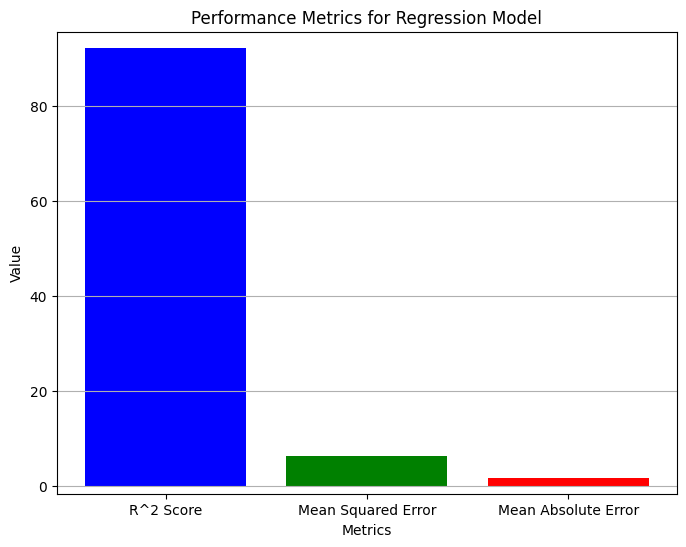

In [208]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict = rf.predict(x_test)
rf.score(x_train,y_train)
m=rf.score(x_test,y_test)
print(m)
accuracyRF=(r2_score(y_test, y_predict)*100)
print("Accuracy:",accuracyRF)
mse=(mean_squared_error(y_test, y_predict))
print("mean_squared_error:",mse)
mae=(mean_absolute_error(y_test, y_predict))
print("mean_absolute_error:",mae)

metrics_names = ['R^2 Score', 'Mean Squared Error', 'Mean Absolute Error']
metrics_values = [accuracyRF, mse, mae]

# Plotting the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics for Regression Model')
plt.ylim([min(metrics_values) - 0.1 * np.mean(metrics_values), max(metrics_values) + 0.1 * np.mean(metrics_values)])
plt.grid(axis='y')
plt.show()


0.9201557730977917
Accuracy: 92.01557730977918
mean_squared_error: 6.516649562394913
mean_absolute_error: 1.809965425468559


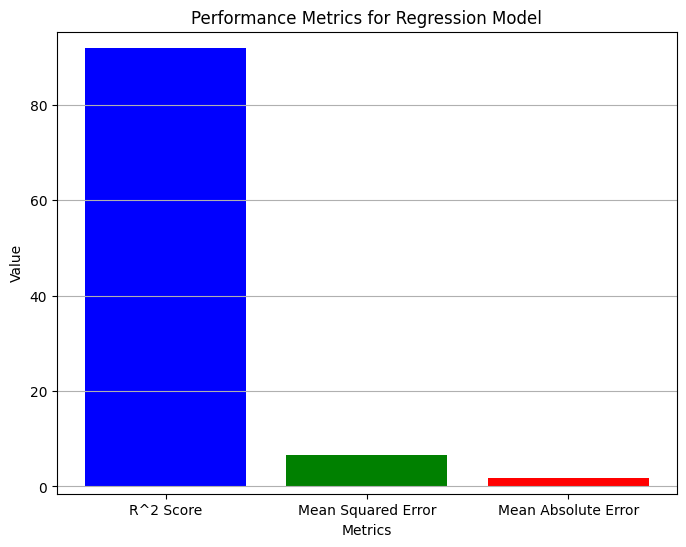

In [213]:
gbm=GradientBoostingRegressor()
gbm.fit(x_train,y_train)
y_predict = gbm.predict(x_test)
gbm.score(x_train,y_train)
m=gbm.score(x_test,y_test)
print(m)
accuracyGBM=(r2_score(y_test, y_predict)*100)
print("Accuracy:",accuracyGBM)
mse=(mean_squared_error(y_test, y_predict))
print("mean_squared_error:",mse)
mae=(mean_absolute_error(y_test, y_predict))
print("mean_absolute_error:",mae)

metrics_names = ['R^2 Score', 'Mean Squared Error', 'Mean Absolute Error']
metrics_values = [accuracyGBM, mse, mae]

# Plotting the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics for Regression Model')
plt.ylim([min(metrics_values) - 0.1 * np.mean(metrics_values), max(metrics_values) + 0.1 * np.mean(metrics_values)])
plt.grid(axis='y')
plt.show()


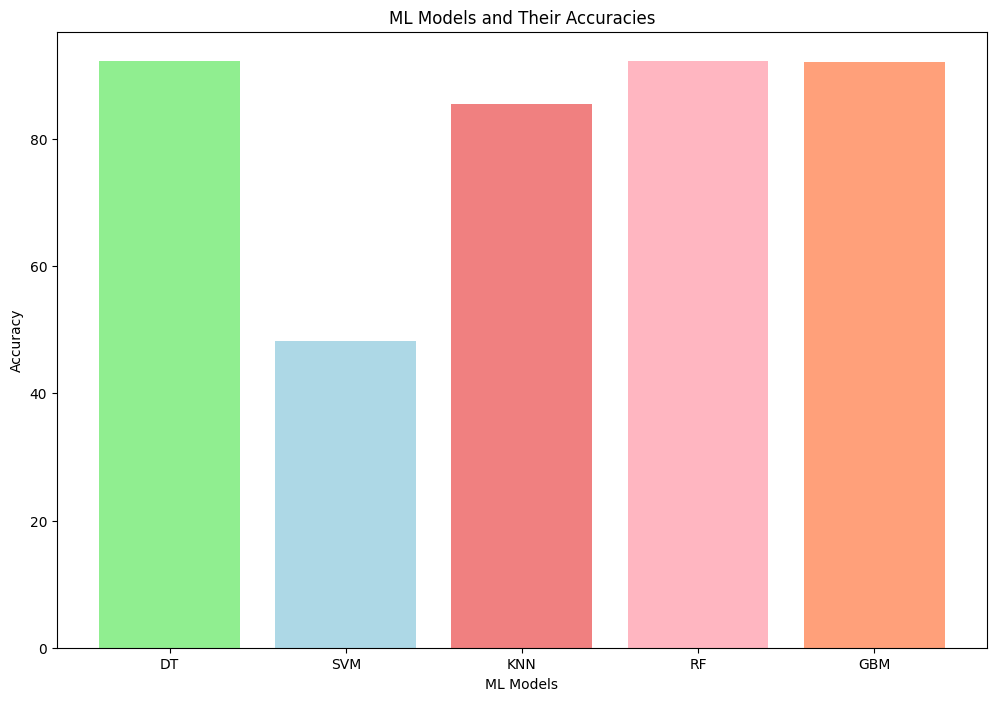

In [217]:
import matplotlib.pyplot as plt


accuracy_scores = [accuracyDT, accuracySVM, accuracyKNN, accuracyRF, accuracyGBM]


models = ['DT', 'SVM', 'KNN', 'RF', 'GBM']


colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightpink', 'lightsalmon']

# Plotting accuracy for each model
plt.bar(models, accuracy_scores, color=colors)

# naming the x-axis
plt.xlabel('ML Models')

# naming the y-axis
plt.ylabel('Accuracy')

# plot title
plt.title('ML Models and Their Accuracies')

# function to show the plot
plt.show()
